<a href="https://colab.research.google.com/github/ArkodevMukherjee/Housing_Prediction_Model/blob/main/Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/boston-housing-dataset


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/altavish/boston-housing-dataset/versions/1/HousingData.csv")

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


-0.39136301677466345
0.3731361297553636
-0.481772101392289
0.18139139285851225
-0.4273207723732826
0.6953599470715393
-0.39465572934562926
0.24992873408590394
-0.3816262306397775
-0.46853593356776685
-0.5077866855375616
0.3334608196570666
-0.7358220118060536


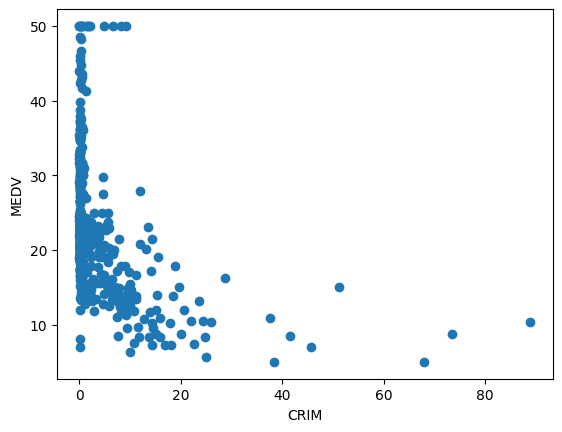

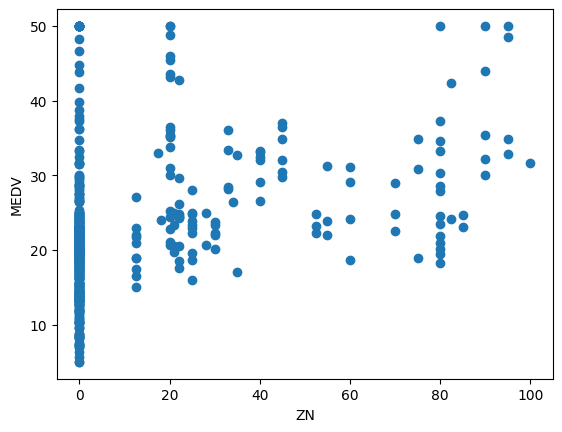

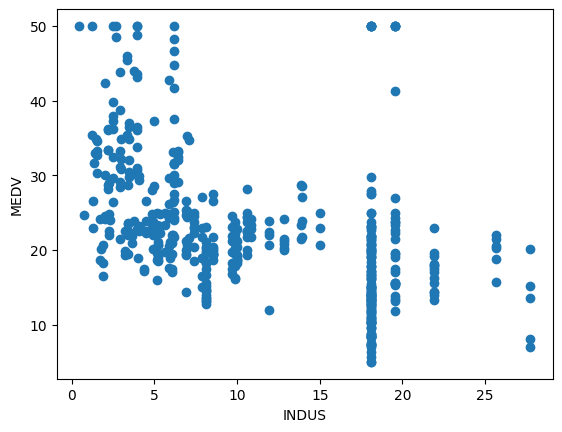

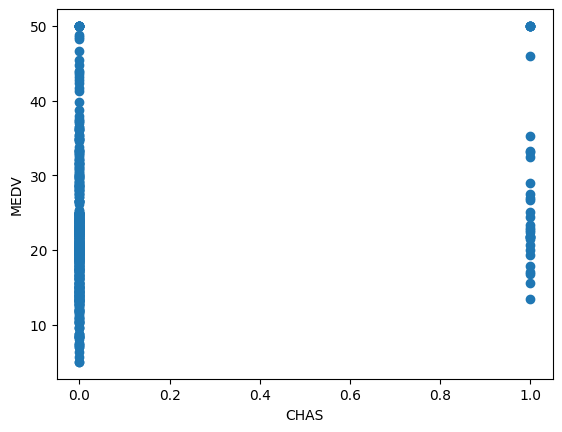

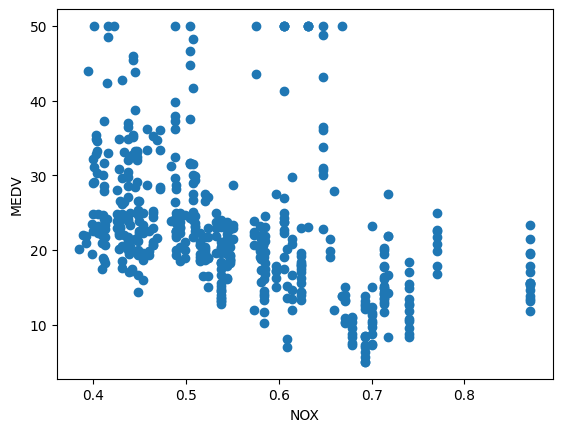

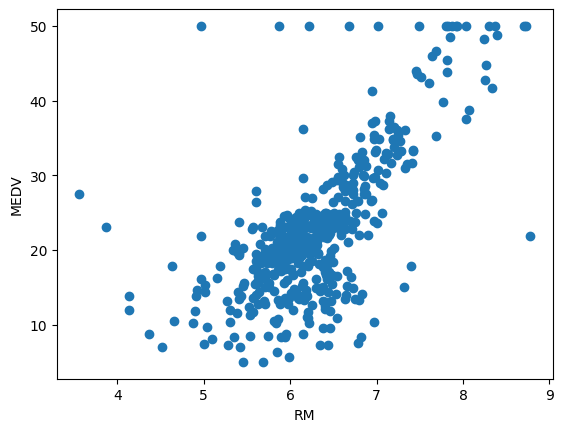

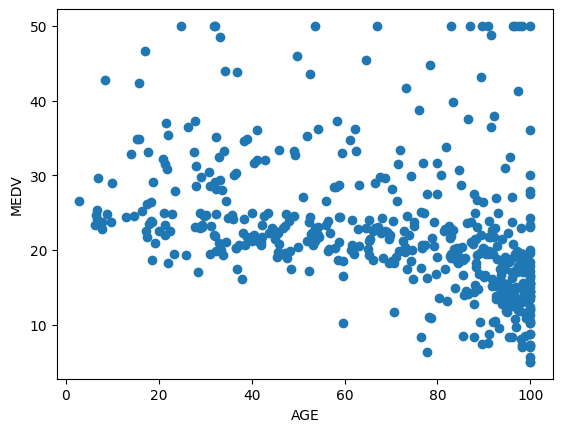

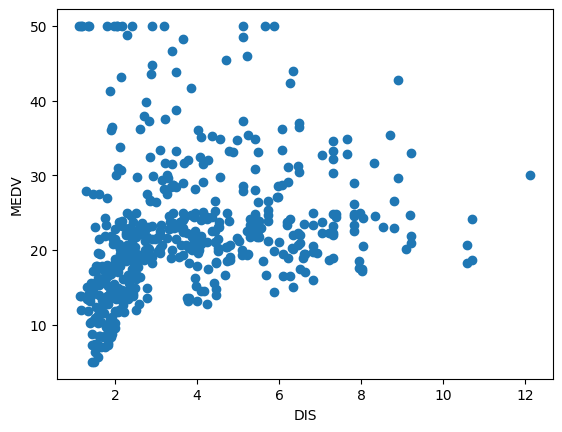

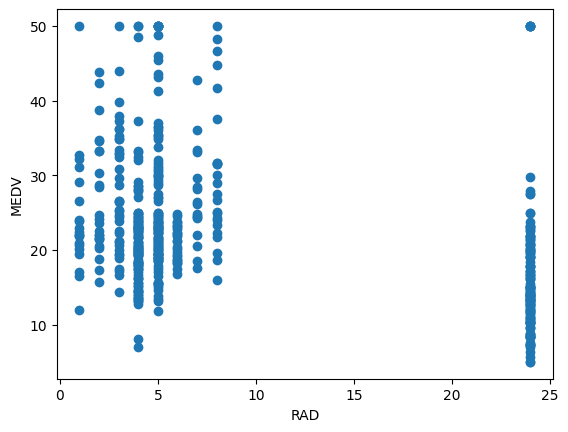

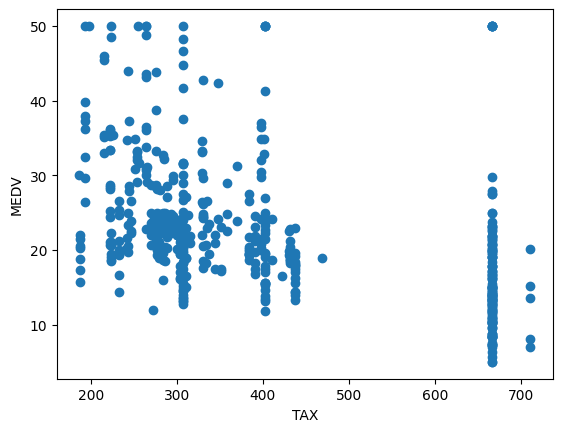

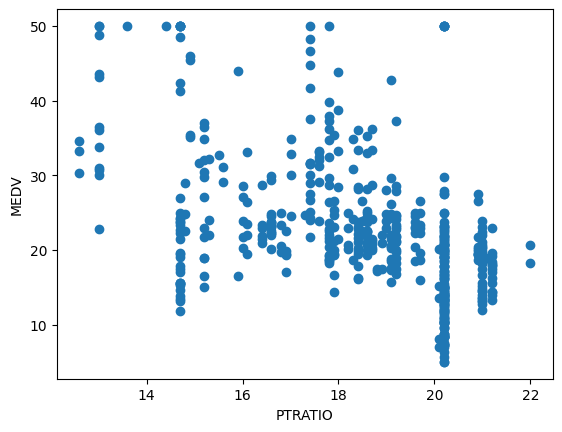

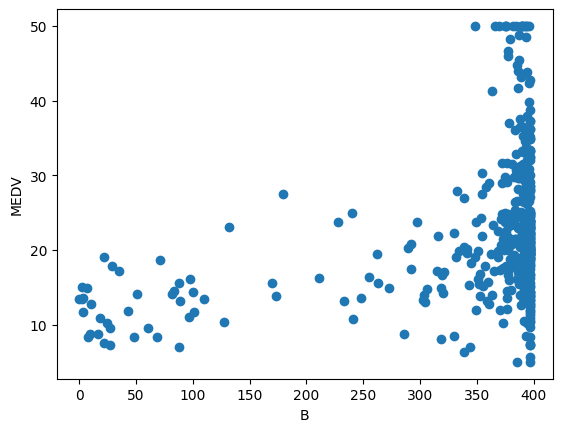

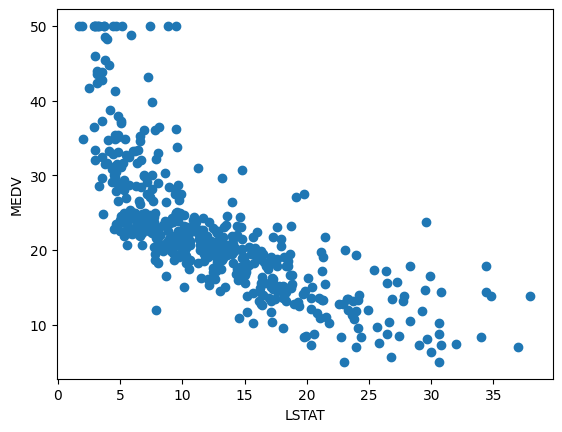

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
for i in range(df.shape[1]-1):
  plt.scatter(df.iloc[:,i],df["MEDV"])
  plt.xlabel(df.columns[i])
  plt.ylabel("MEDV")

  print(df["MEDV"].corr(df.iloc[:,i]))
  plt.figure()

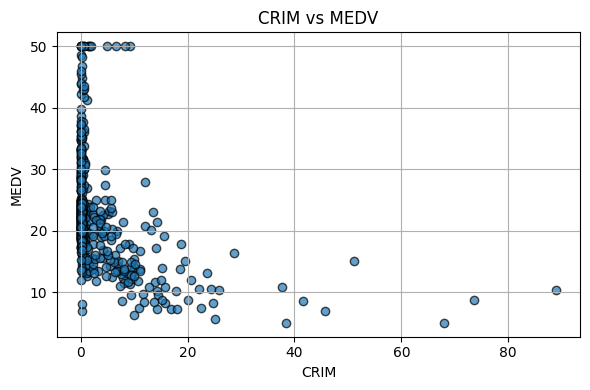

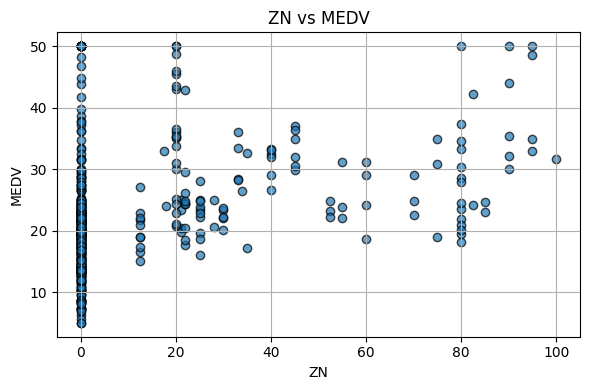

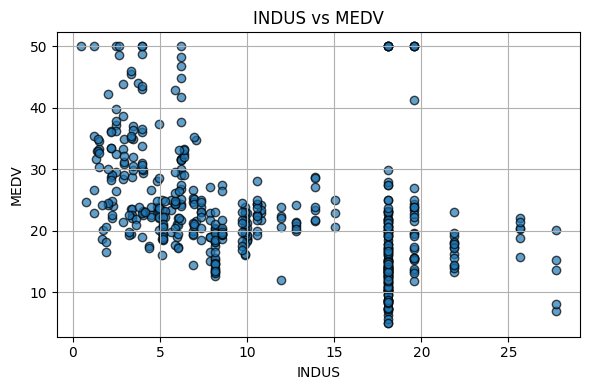

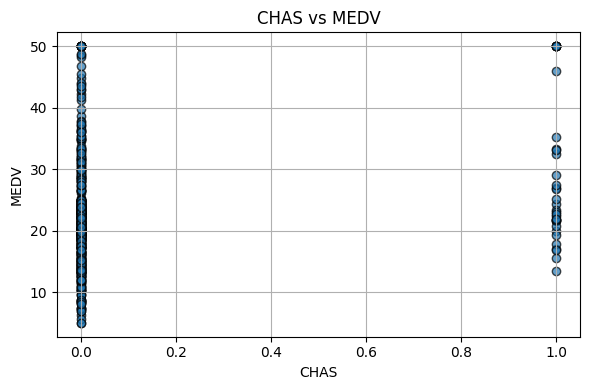

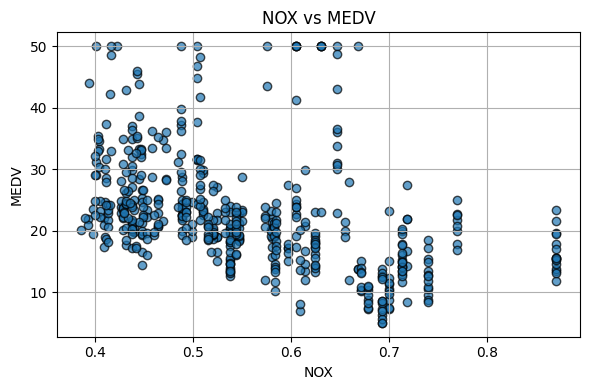

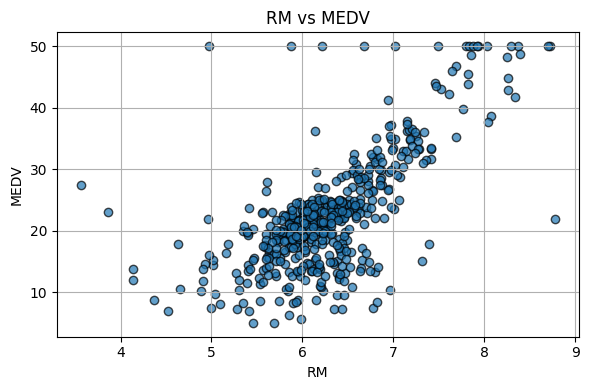

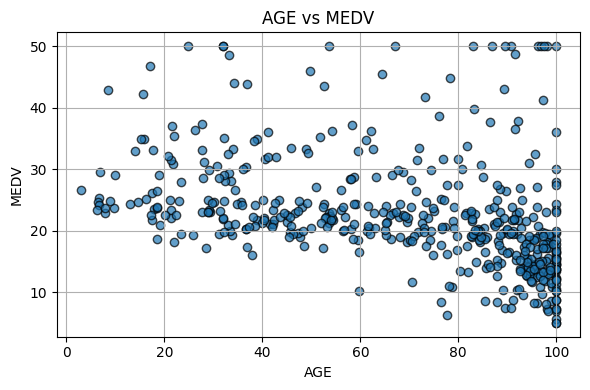

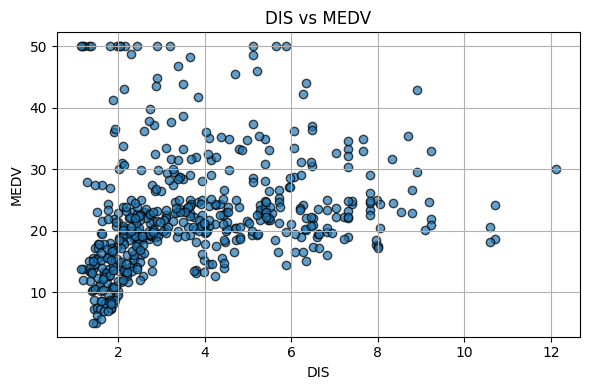

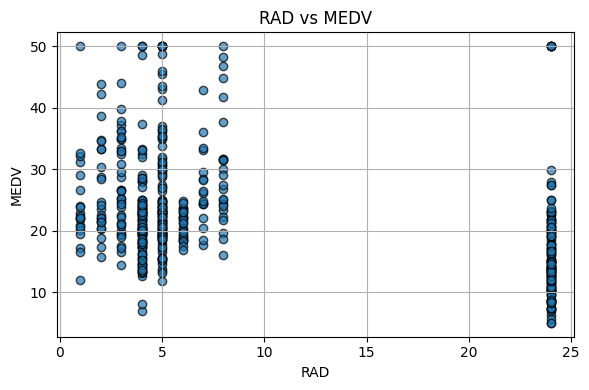

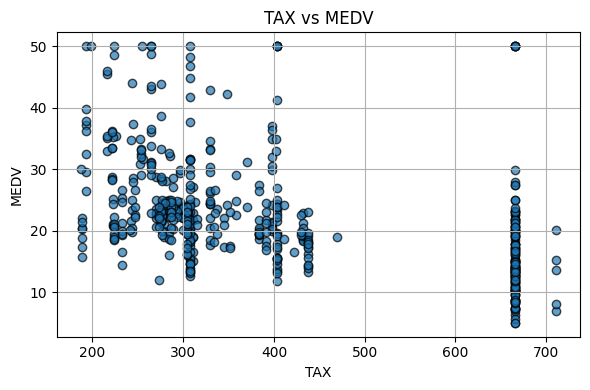

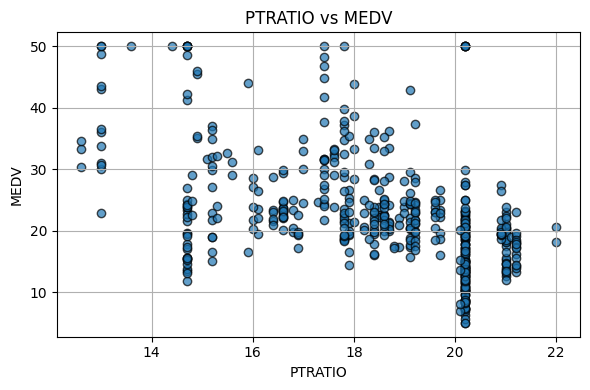

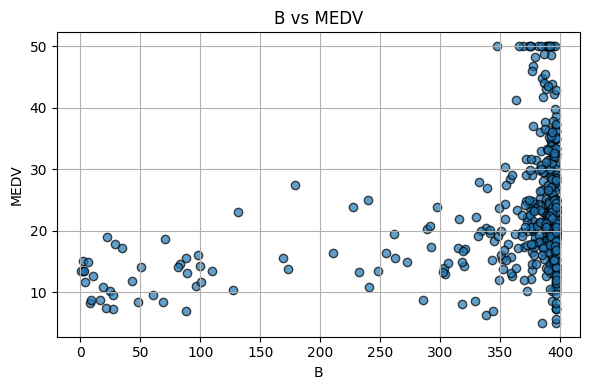

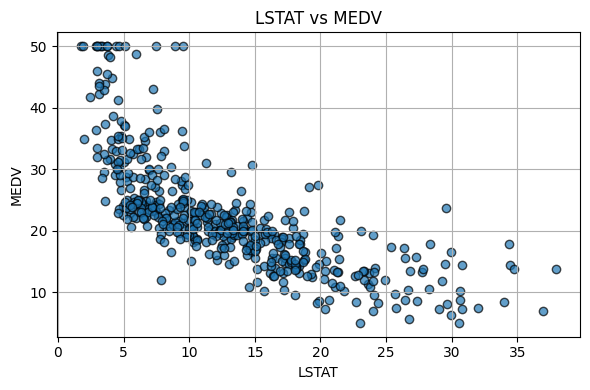

In [ ]:
import matplotlib.pyplot as plt

for i in range(df.shape[1]-1):
    plt.figure(figsize=(6,4))
    plt.scatter(df.iloc[:, i], df["MEDV"], alpha=0.7, edgecolors="k")
    plt.xlabel(df.columns[i])
    plt.ylabel("MEDV")
    plt.title(f"{df.columns[i]} vs MEDV")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(0,df.shape[1]-1):
  if (np.abs(df["MEDV"].corr(df.iloc[:,i]))>0.1) and (df.iloc[:,i].isnull().sum()== 0):
    print(df.columns[i])

NOX
RM
DIS
RAD
TAX
PTRATIO
B


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
new_df = scaler.transform(df)

In [ ]:
new_df = pd.DataFrame(new_df,columns=df.columns)
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105,0.159686
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165,-0.101524
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000,1.324247
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479,1.182758
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,0.020789,-0.625796,-0.982843,-0.803212,1.176466,0.387217,NaN,-0.014454
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,0.292502,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.508558,-0.210362
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,0.803751,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.989778,0.148802
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,0.742973,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.872271,-0.057989


-0.39136301677466356
0.37313612975536375
-0.48177210139228926
0.18139139285851236
-0.42732077237328303
0.6953599470715395
-0.39465572934562965
0.24992873408590405
-0.3816262306397781
-0.4685359335677666
-0.5077866855375612
0.3334608196570663
-0.7358220118060533


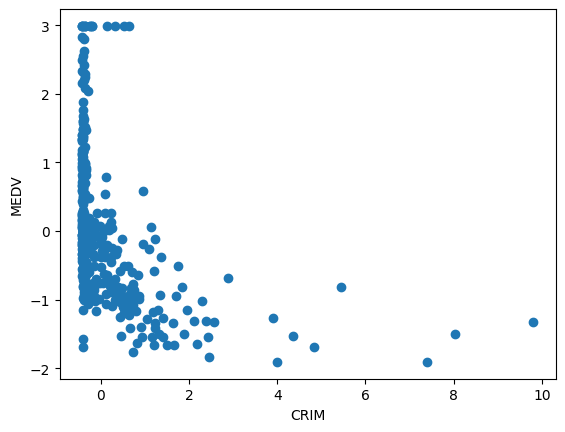

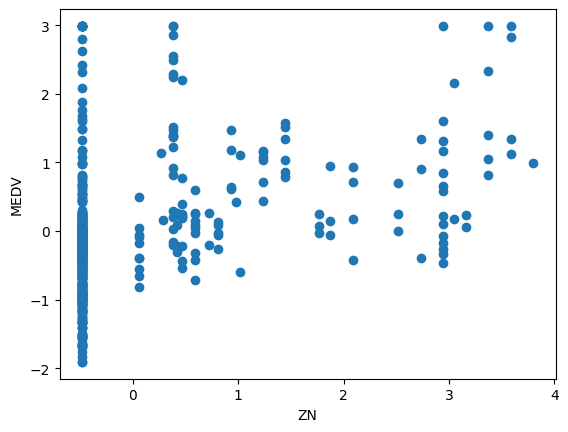

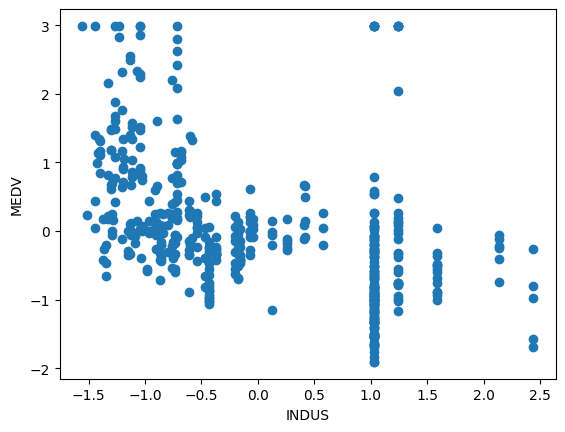

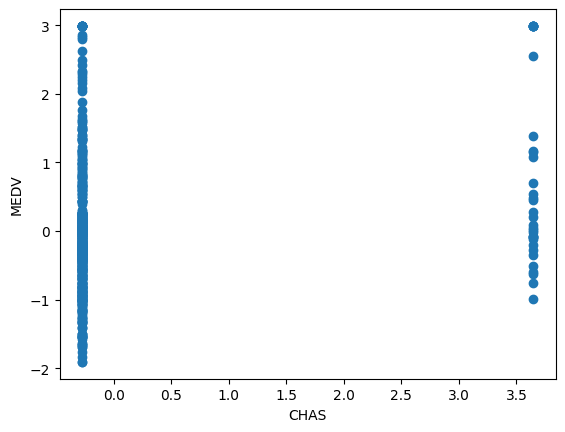

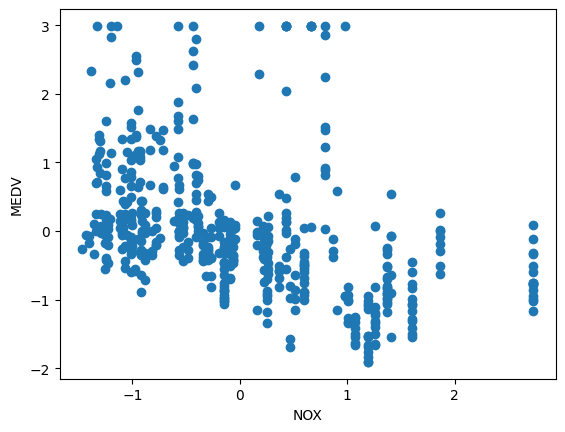

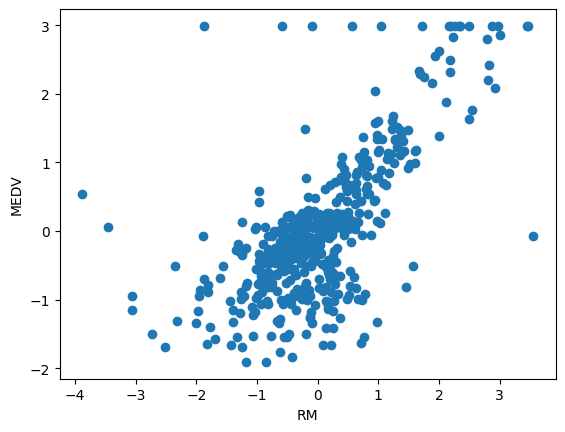

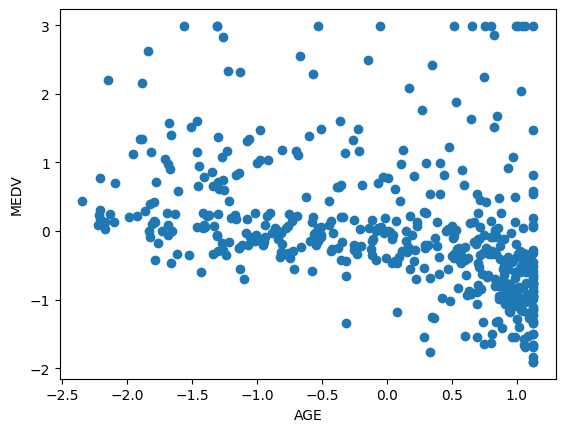

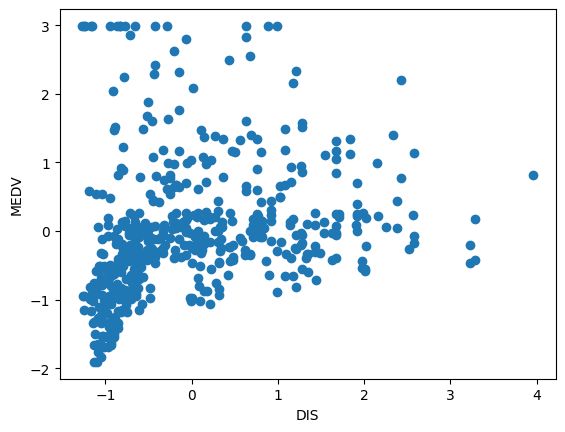

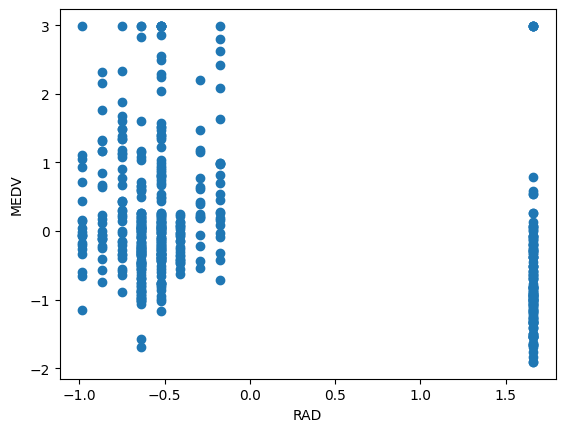

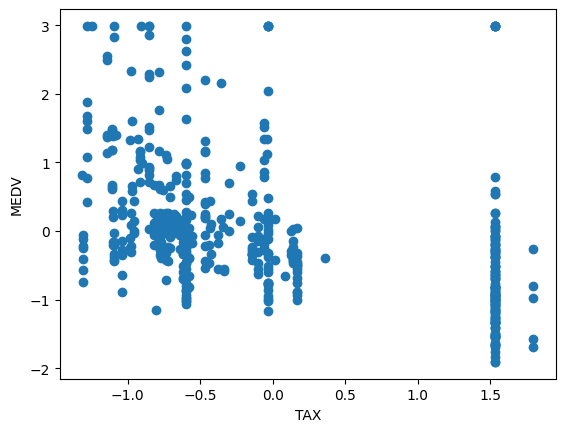

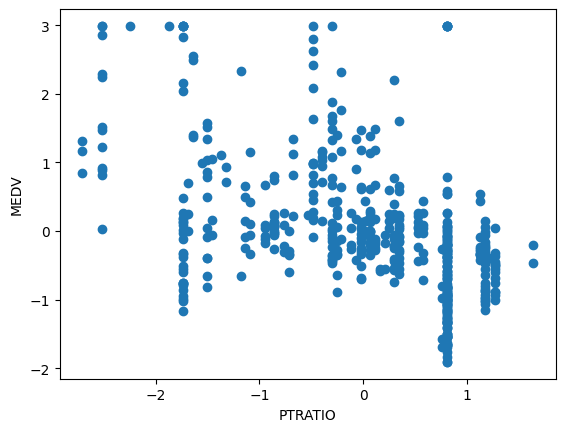

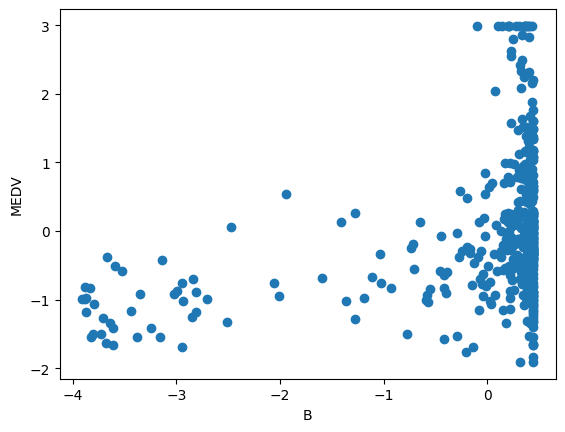

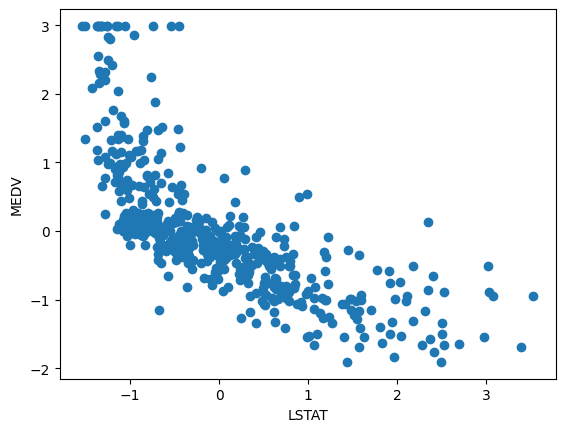

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
for i in range(new_df.shape[1]-1):
  plt.scatter(new_df.iloc[:,i],new_df["MEDV"])
  plt.xlabel(new_df.columns[i])
  plt.ylabel("MEDV")

  print(new_df["MEDV"].corr(new_df.iloc[:,i]))
  plt.figure()

In [ ]:
# For the machine learning model where the missing values columns are not taken in the model

In [ ]:
X = new_df.drop(["CRIM","INDUS","ZN","CHAS","AGE","LSTAT"],axis=1)

In [ ]:
X = X.drop(["MEDV"],axis=1)

In [ ]:
X.isnull().sum()

,0
NOX,0
RM,0
DIS,0
RAD,0
TAX,0
PTRATIO,0
B,0


In [ ]:
Y = new_df["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train

,NOX,RM,DIS,RAD,TAX,PTRATIO,B
477,0.512296,-1.397069,-0.805438,1.661245,1.530926,0.806576,-0.078878
15,-0.144217,-0.642000,0.334449,-0.637962,-0.601276,1.176466,0.427018
332,-1.008914,-0.361342,1.352738,-0.982843,-0.619094,-0.719220,0.061137
423,0.512296,-0.258767,-0.842945,1.661245,1.530926,0.806576,-3.883072
19,-0.144217,-0.794439,0.000693,-0.637962,-0.601276,1.176466,0.375814
...,...,...,...,...,...,...,...
106,-0.299707,-0.639151,-0.753005,-0.523001,-0.143951,1.130230,0.427566
270,-0.783454,-0.610658,0.301364,-0.752922,-1.100176,0.066796,0.350596
348,-1.033965,0.499151,2.162434,-0.637962,-0.761637,-0.672984,0.375704
435,1.600725,0.490603,-0.794029,1.661245,1.530926,0.806576,-2.706267


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.intercept_

np.float64(-0.00632936649560905)

In [ ]:
lr.coef_

array([-0.30354832,  0.53723534, -0.23457625,  0.14551929, -0.16806649,
       -0.26921464,  0.18014414])

In [ ]:
lr.predict(X_test)

array([ 6.83091160e-01,  8.53926566e-01, -6.98420078e-01,  1.58806471e-02,
       -4.29426737e-01,  2.06528743e-01, -1.99326457e-01, -4.30422925e-01,
       -6.81626151e-02, -1.93755757e-01,  2.42831898e-01,  3.29783803e-02,
       -2.24492015e+00,  8.84578570e-02, -4.18652765e-01,  3.13991445e-01,
       -1.28130767e-01, -1.41708266e+00,  1.99129336e+00, -4.79935263e-01,
        2.63440325e-01,  6.35690819e-01, -7.50503070e-01,  7.34886149e-02,
       -7.38823692e-01, -8.28128942e-01, -1.09429490e-01, -8.61233572e-01,
        7.40640480e-04, -4.16079414e-01,  4.54760248e-02,  1.62434532e-01,
        5.98951009e-01, -1.27350439e+00, -4.41644943e-01, -8.24628588e-01,
        9.69453371e-01, -4.10386541e-01,  1.63982469e-02,  1.26509740e-01,
       -7.14798600e-01,  9.40361954e-01,  2.17393706e+00, -4.59882963e-01,
        5.09027057e-01, -7.74616799e-01, -7.12741528e-01,  2.71111665e-01,
       -2.31029679e-01,  6.68045061e-01,  9.76780635e-02,  1.27678102e+00,
       -3.21050742e-01,  

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
print(r2_score(Y_test,lr.predict(X_test)))
print(mean_absolute_error(Y_test,lr.predict(X_test)))
print(mean_squared_error(Y_test,lr.predict(X_test)))
print(root_mean_squared_error(Y_test,lr.predict(X_test)))

0.5595285737530566
0.3740203536269784
0.38262977835322826
0.618570754524677


In [ ]:
Y = df["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

array([28.80905579, 30.37869347, 16.11571458, 22.67871789, 18.58722851,
       24.4303948 , 20.70139254, 18.57807552, 21.90652743, 20.7525762 ,
       24.76394861, 22.83581206,  1.90645409, 23.34555814, 18.68621989,
       25.41776334, 21.35553936,  9.5126345 , 40.82883271, 18.12315558,
       24.95329908, 28.37354091, 15.63717545, 23.20802057, 15.74448571,
       14.92394804, 21.52736691, 14.61978232, 22.53961134, 18.70986386,
       22.95064056, 24.02525668, 28.03597511, 10.83183327, 18.47496749,
       14.95610934, 31.44015509, 18.76217005, 22.68347361, 23.69517928,
       15.96522854, 31.17286281, 42.50696509, 18.30739635, 27.20975281,
       15.41561823, 15.98412893, 25.02378344, 20.41010297, 28.67081205,
       23.4302735 , 34.26388506, 19.5829884 , 25.19652903, 38.74019518,
       20.2254103 , 17.9529077 , 29.15838803, 25.89774421, 16.59098615,
       24.17711803, 30.20897859, 28.3334739 , 12.98533271, 20.47714404,
       18.27611024, 21.07601157, 24.4735406 , 27.37519835,  9.31

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
print(r2_score(Y_test,lr.predict(X_test)))
print(mean_absolute_error(Y_test,lr.predict(X_test)))
print(mean_squared_error(Y_test,lr.predict(X_test)))
print(root_mean_squared_error(Y_test,lr.predict(X_test)))

0.5595285737530569
3.4365033272937136
32.30143606071151
5.68343523414418


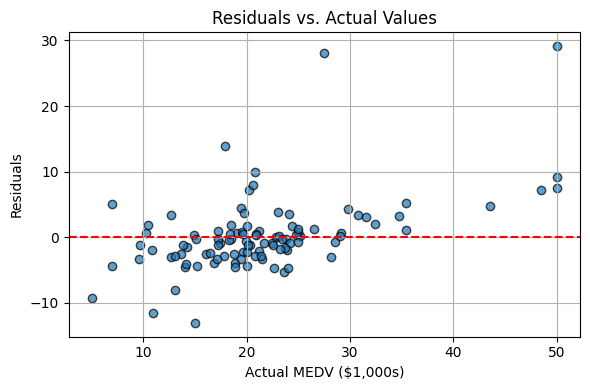

In [ ]:
residuals = Y_test - lr.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(Y_test, residuals, alpha=0.7, edgecolors="k")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual MEDV ($1,000s)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()

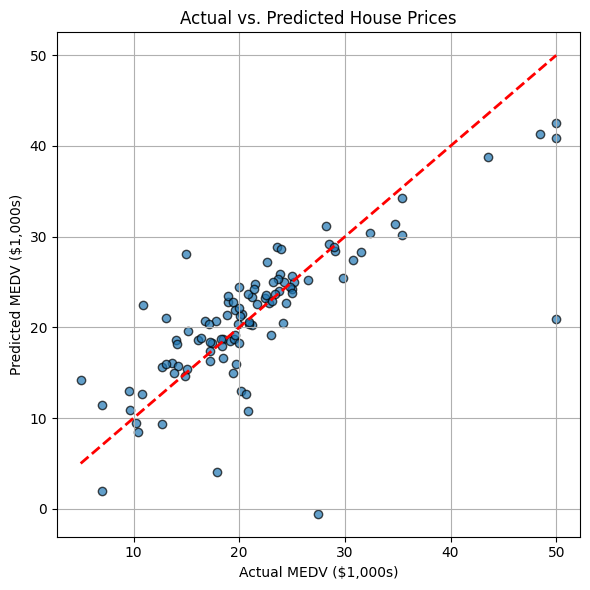

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test, lr.predict(X_test), alpha=0.7, edgecolors="k")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle="--", lw=2)  # diagonal line
plt.xlabel("Actual MEDV ($1,000s)")
plt.ylabel("Predicted MEDV ($1,000s)")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

pl = LinearRegression()
pl.fit(X_poly, Y_train)

pl.Y_train_pred = pl.predict(X_poly)

In [ ]:
pl_y = pl.predict(poly.transform(X_test))

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
print(r2_score(Y_train,pl.predict(X_poly)))
print(mean_absolute_error(Y_test,pl_y))
print(mean_squared_error(Y_test,pl_y))
print(root_mean_squared_error(Y_test,pl_y))

0.7625023039708736
2.9690366702360245
21.133755418500467
4.597146443012281


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
print(r2_score(Y_test,pl_y))
print(mean_absolute_error(Y_test,pl_y))
print(mean_squared_error(Y_test,pl_y))
print(root_mean_squared_error(Y_test,pl_y))

0.7118141938443614
2.9690366702360245
21.133755418500467
4.597146443012281


In [ ]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=1.0)
rg.fit(X_train, Y_train)

Ridge()

In [ ]:
ypredicted = rg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
print(r2_score(Y_test,ypredicted))
print(mean_absolute_error(Y_test,ypredicted))
print(mean_squared_error(Y_test,ypredicted))
print(root_mean_squared_error(Y_test,ypredicted))

0.5594709646086833
3.43704738425912
32.305660757213055
5.683806889507512


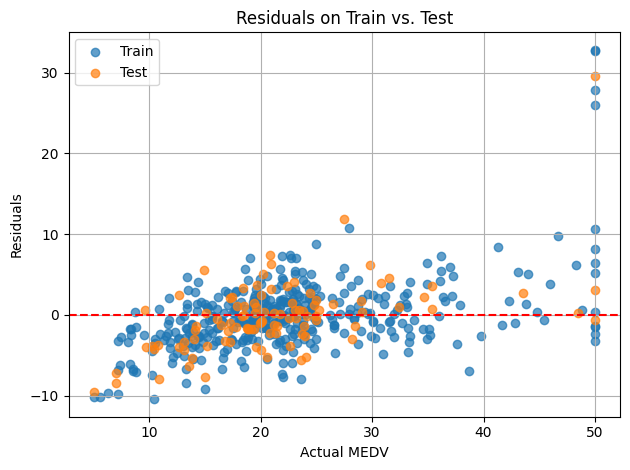

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_train, Y_train - pl.Y_train_pred, alpha=0.7, label="Train")
plt.scatter(Y_test, Y_test - pl_y, alpha=0.7, label="Test")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual MEDV")
plt.ylabel("Residuals")
plt.title("Residuals on Train vs. Test")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

degree = 2
alpha = 1.0  # Ridge regularization strength

model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alpha)
)

In [ ]:
model.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# R2 scores
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

# RMSE
rmse_train = mean_squared_error(Y_train, y_train_pred)
rmse_test = mean_squared_error(Y_test, y_test_pred)

print("Train R2:", r2_train)
print("Test R2:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train R2: 0.7608639644516558
Test R2: 0.713988213173917
Train RMSE: 20.774561387203796
Test RMSE: 20.97432635640048


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "polynomialfeatures__degree": [2, 3],
    "ridge__alpha": [0.1, 1.0, 8.0, 9.0, 10.0, 20.0]
}

model = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    Ridge()
)

grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid.fit(X_train, Y_train)

print("Best parameters:", grid.best_params_)
print("Best R2 on training set:", grid.best_score_)

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}
Best R2 on training set: 0.7241242433839479


In [ ]:
# Re-fit the model on all training data
best_model = grid.best_estimator_
best_model.fit(X_train, Y_train)

# Predict on test data
y_test_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error

r2_test = r2_score(Y_test, y_test_pred)
rmse_test = mean_squared_error(Y_test, y_test_pred)

print("Test R2:", r2_test)
print("Test RMSE:", rmse_test)

Test R2: 0.7114982137271416
Test RMSE: 21.156927435899632


In [ ]:
# This is the model with where all the columns are used

In [ ]:
new_df = new_df.fillna(new_df.mean())

In [ ]:
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-1.186427e-01,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105e+00,0.159686
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,3.711557e-01,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-5.001650e-01,-0.101524
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-2.652247e-01,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000e+00,1.324247
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-8.122258e-01,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479e+00,1.182758
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-5.119115e-01,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.023415e-16,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,2.078896e-02,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-1.023415e-16,-0.014454
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,2.925019e-01,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-5.085584e-01,-0.210362
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,8.037513e-01,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-9.897779e-01,0.148802
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,7.429734e-01,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-8.722708e-01,-0.057989


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_df.drop(["MEDV"],axis=1),df["MEDV"],test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

# Training Metrics
print(r2_score(Y_train,lr.predict(X_train)))
print(mean_absolute_error(Y_train,lr.predict(X_train)))
print(mean_squared_error(Y_train,lr.predict(X_train)))
print(mean_squared_error(Y_train,lr.predict(X_train)))

print()

# Testing Metrics
print(r2_score(Y_test,lr.predict(X_test)))
print(mean_absolute_error(Y_test,lr.predict(X_test)))
print(mean_squared_error(Y_test,lr.predict(X_test)))
print(mean_squared_error(Y_test,lr.predict(X_test)))

0.7420299863537105
3.358334361003422
22.410733172287667
22.410733172287667

0.6588520195508119
3.1499233573458034
25.017672023842863
25.017672023842863


In [ ]:
model.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Train metrics
print("Train R2:", r2_score(Y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(Y_train, y_train_pred))
print("Train RMSE:", mean_squared_error(Y_train, y_train_pred))

print()

# Test metrics
print("Test R2:", r2_score(Y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(Y_test, y_test_pred))
print("Test RMSE:", mean_squared_error(Y_test, y_test_pred))

Train R2: 0.9291528213484324
Train MAE: 1.8570539127282697
Train RMSE: 6.154735561423325

Test R2: 0.7781174130762766
Test MAE: 2.579581712228424
Test RMSE: 16.271489516515842


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

degree = 2
alpha = 10.0  # Regularization strength

ridge_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alpha)
)

ridge_model.fit(X_train, Y_train)

y_test_pred_ridge = ridge_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Ridge Test R2:", r2_score(Y_test, y_test_pred_ridge))
print("Ridge Test RMSE:", mean_squared_error(Y_test, y_test_pred_ridge))

Ridge Test R2: 0.8009535050269949
Ridge Test RMSE: 14.59683250117267


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Lasso(alpha=0.1, max_iter=10000)  # Lasso often needs higher max_iter
)

lasso_model.fit(X_train, Y_train)

y_test_pred_lasso = lasso_model.predict(X_test)

print("Lasso Test R2:", r2_score(Y_test, y_test_pred_lasso))
print("Lasso Test RMSE:", mean_squared_error(Y_test, y_test_pred_lasso))

Lasso Test R2: 0.8061415390851185
Lasso Test RMSE: 14.216374336525865


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "ridge__alpha": [0.1, 1, 5, 10, 20]
}

ridge_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge()
)

ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="r2")
ridge_grid.fit(X_train, Y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R2:", ridge_grid.best_score_)

Best Ridge alpha: {'ridge__alpha': 20}
Best Ridge R2: 0.8313347687672306


In [ ]:
lasso_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Lasso(max_iter=10000)
)

param_grid = {
    "lasso__alpha": [0.01, 0.1, 1, 5, 10]
}

lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="r2")
lasso_grid.fit(X_train, Y_train)

print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R2:", lasso_grid.best_score_)

Best Lasso alpha: {'lasso__alpha': 0.1}
Best Lasso R2: 0.824093715620615


In [ ]:
ridge_model.fit(X_train, Y_train)

# Predict train and test
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Metrics
print("Train R2:", r2_score(Y_train, y_train_pred))
print("Test R2:", r2_score(Y_test, y_test_pred))

Train R2: 0.9195539786913853
Test R2: 0.8009535050269949


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create the pipeline
model = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    Ridge()
)

# Define the parameter grid
param_grid = {
    "polynomialfeatures__degree": [2, 3],
    "ridge__alpha": [0.1, 1.0, 10.0, 20.0]
}

# Setup GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,           # 5-fold cross-validation
    scoring="r2"    # Evaluate using R2 score
)

# Fit on training data
grid.fit(X_train, Y_train)

# Best parameters
print("Best parameters:", grid.best_params_)
print("Best R2 on training set:", grid.best_score_)

Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 20.0}
Best R2 on training set: 0.8313347687672306


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    ridge_grid.best_estimator_,
    new_df.drop(["MEDV"], axis=1),
    df["MEDV"],
    cv=10,
    scoring="r2"
)
print("Mean R2:", scores.mean())

Mean R2: 0.019612456880932605


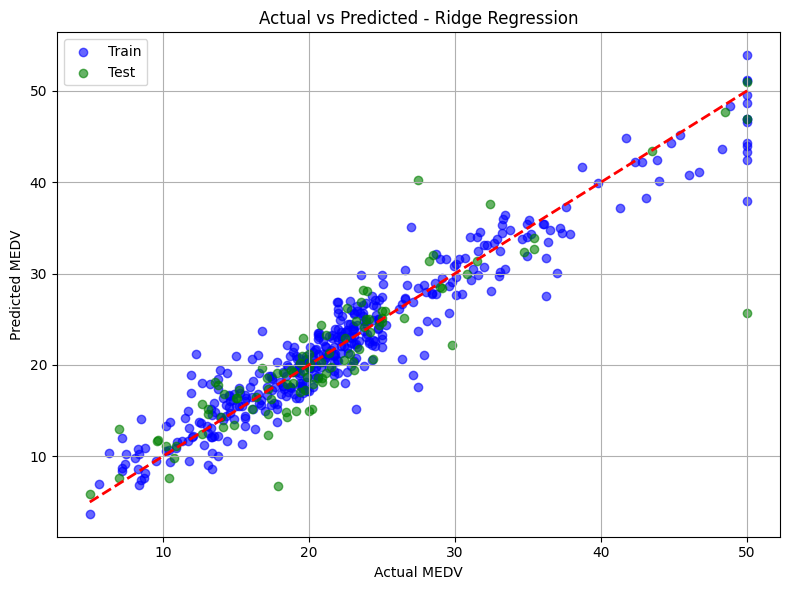

In [ ]:
import matplotlib.pyplot as plt

# Predict on train and test
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(Y_train, y_train_pred, color="blue", alpha=0.6, label="Train")
plt.scatter(Y_test, y_test_pred, color="green", alpha=0.6, label="Test")
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Ridge Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',  # For regression
    verbose=2
)

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best RMSE (cross-validation):", (-grid_search.best_score_)**0.5)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE (cross-validation): 3.750200679067648


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse_test = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Test RMSE:", rmse_test)
print("Test R2:", r2)

Test RMSE: 11.244781878210668
Test R2: 0.8466630058669246


In [ ]:
!git config --global user.email 'arkodev.programmwer@gmail.com'
!git config --global user.name 'Arkodev Mukherjee'

In [ ]:
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/ArkodevMukherjee/Housing_Prediction_Model.git
!git push -u origin main

[main (root-commit) d3a5dd0] first commit
 21 files changed, 51025 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.07.01/21.03.20.550425.log
 create mode 100644 .config/logs/2025.07.01/21.03.41.948871.log
 create mode 100644 .config/logs/2025.07.01/21.03.53.252709.log
 create mode 100644 .config/logs/2025.07.01/21.03.54.626322.log
 create mode 100644 .config/logs/2025.07.01/21.04.06.597104.log
 create mode 100644 .config/logs/2025.07.01/21.04.07.490711.log
 create mode 100755 sample_data/README.md
 create mode 100755 s

In [ ]:
!git add .

In [ ]:
!git status

On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .config/.last_opt_in_prompt.yaml
	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/default_configs.db
	new file:   .config/gce
	new file:   .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
	new file:   .config/logs/2025.07.01/21.03.20.550425.log
	new file:   .config/logs/2025.07.01/21.03.41.948871.log
	new file:   .config/logs/2025.07.01/21.03.53.252709.log
	new file:   .config/logs/2025.07.01/21.03.54.626322.log
	new file:   .config/logs/2025.07.01/21.04.06.597104.log
	new file:   .config/logs/2025.07.01/21.04.07.490711.log
	new file:   sample_data/README.md
	new file:   sample_data/anscombe.json
	new file:   sample_data/california_housing_test.csv
	new file:   sampl

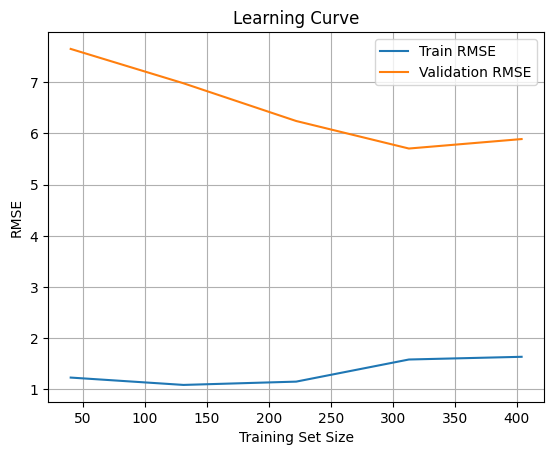

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, Y, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_rmse = (-train_scores.mean(axis=1))**0.5
test_rmse = (-test_scores.mean(axis=1))**0.5

plt.plot(train_sizes, train_rmse, label='Train RMSE')
plt.plot(train_sizes, test_rmse, label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning Curve')
plt.grid(True)
plt.show()